In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv("salaries.csv")

In [47]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [48]:
df.drop('salary',axis=1,inplace=True)

In [49]:
df.rename(columns={'salary_in_usd':'salary'},inplace=True)

In [50]:
len(df)

16534

In [51]:
df.describe()

,work_year,salary,remote_ratio
count,16534.000000,16534.000000,16534.000000
mean,2023.226866,149686.777973,32.003750
std,0.713558,68505.293156,46.245158
min,2020.000000,15000.000000,0.000000
25%,2023.000000,101125.000000,0.000000
50%,2023.000000,141300.000000,0.000000
75%,2024.000000,185900.000000,100.000000
max,2024.000000,800000.000000,100.000000


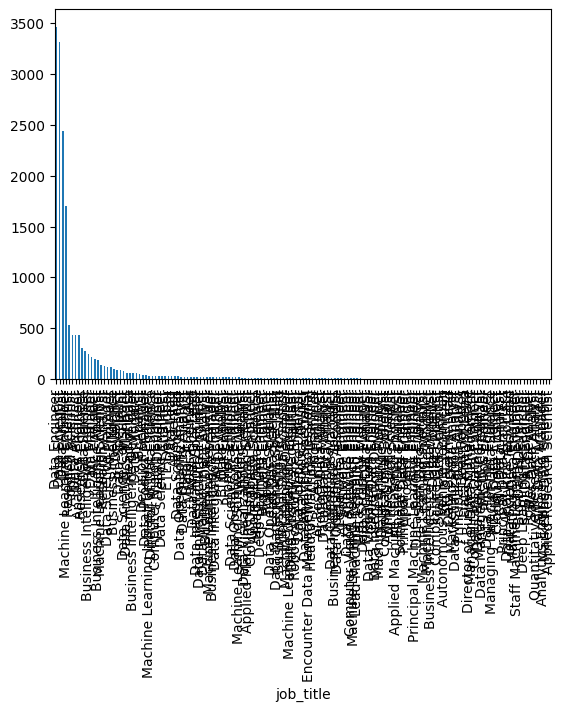

In [52]:
df["job_title"].value_counts().plot(kind="bar")
plt.show()

In [53]:
df["job_title"].value_counts()

job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64

In [54]:
#filter the classes with highest frequency
df_filtered=df.groupby("job_title").filter(lambda x: len(x)>50)
df_filtered_low=df.groupby("job_title").filter(lambda x: len(x)<50)
len(df_filtered)

15279

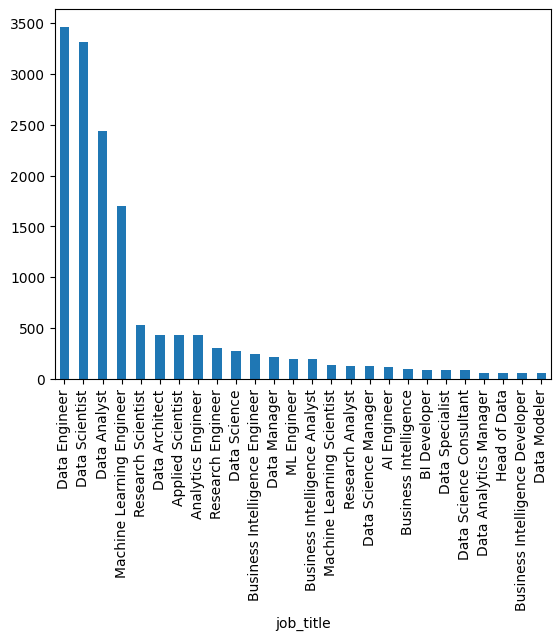

In [55]:
df_filtered["job_title"].value_counts().plot(kind="bar")
plt.show()

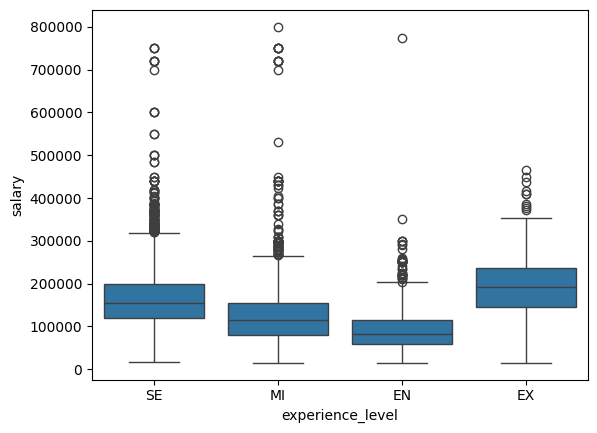

In [56]:
import seaborn as sns
sns.boxplot(x="experience_level",y="salary",data=df)
plt.show()

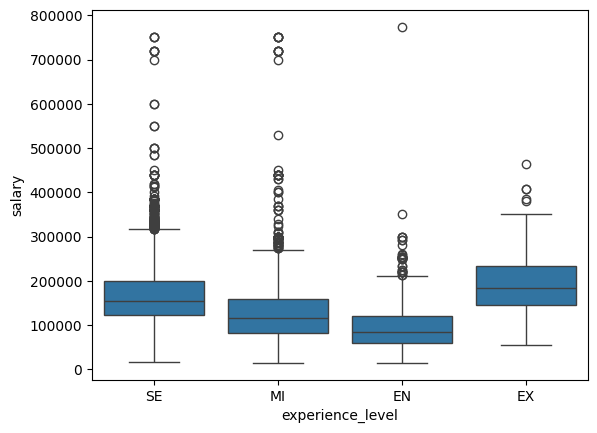

In [57]:
sns.boxplot(x="experience_level",y="salary",data=df_filtered)
plt.show()

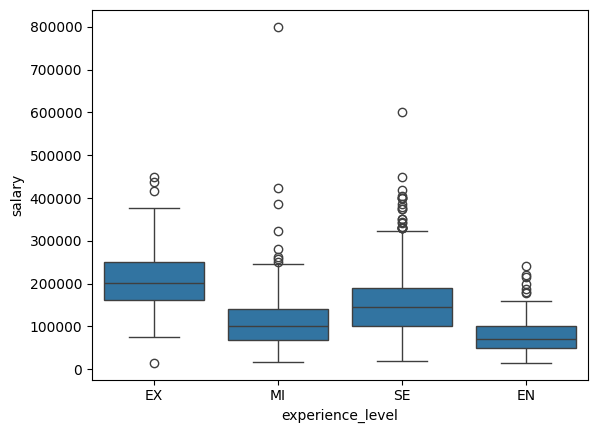

In [58]:
sns.boxplot(x="experience_level",y="salary",data=df_filtered_low)
plt.show()

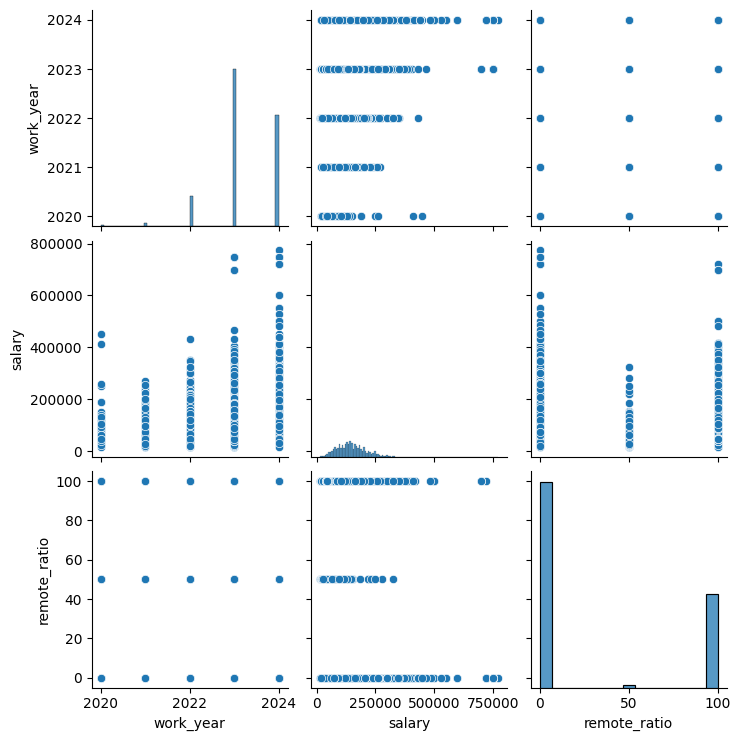

In [59]:
#cornerplot
sns.pairplot(df_filtered)
plt.show()

In [60]:
df_non_remote=df_filtered[df_filtered["remote_ratio"]==0]
df_remote=df_filtered[df_filtered["remote_ratio"]==100]

In [61]:
#average salary for remote and non remote jobs
print(df_non_remote["salary"].mean())
print(df_remote["salary"].mean())

153592.15049010186
147369.04937486755


In [62]:
#drop rows with work_year 2020 and 2021
df_2022=df_filtered[df_filtered["work_year"]>2021]

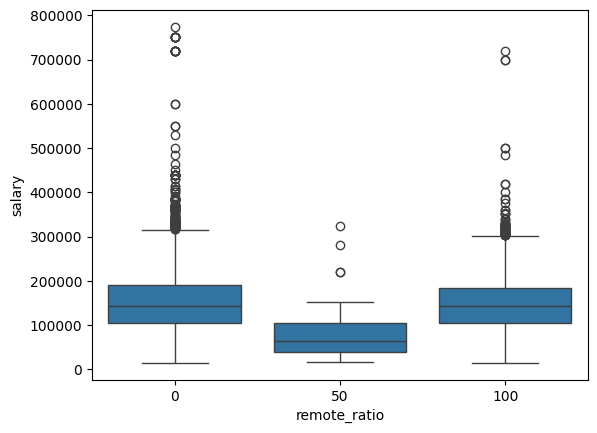

In [63]:
sns.boxplot(x="remote_ratio",y="salary",data=df_2022)
plt.show()

In [64]:
#heatmap of experience level and remote ratio, color by salary
#take the average salary for each combination of experience level and remote ratio
df_heatmap=df_filtered.groupby(["experience_level","remote_ratio"])["salary"].max().reset_index()

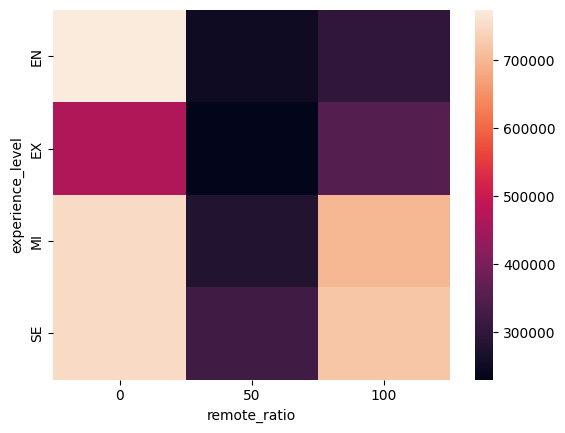

In [65]:
#plot the heatmap
sns.heatmap(df_heatmap.pivot(index="experience_level",columns="remote_ratio",values="salary"))
plt.show()

<Axes: xlabel='work_year'>

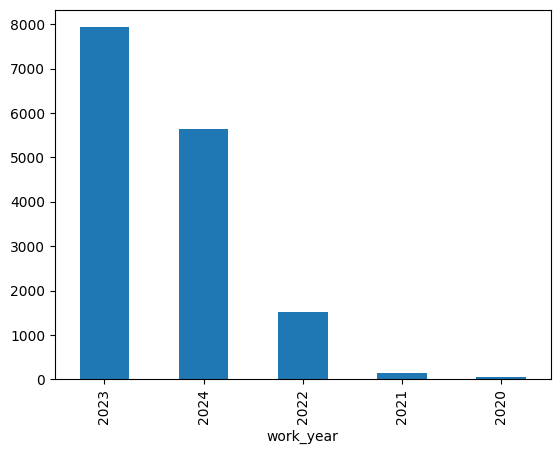

In [66]:
df_filtered["work_year"].value_counts().plot(kind="bar")

In [67]:
#filter for nation US
df_us=df_filtered[df_filtered["company_location"]=="US"]
len(df_us)

13596

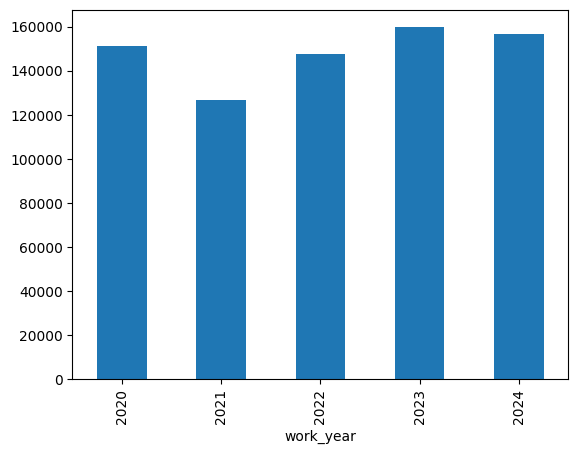

In [68]:
#plot the average salary for each year
df_us.groupby("work_year")["salary"].mean().plot(kind="bar")
plt.show()

In [69]:
df_filtered.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,USD,190000,US,0,US,M


In [70]:
df_filtered['company_location'].value_counts()

company_location
US    13596
GB      616
CA      403
ES      119
DE       75
      ...  
GH        1
AS        1
KE        1
OM        1
MT        1
Name: count, Length: 65, dtype: int64

In [71]:
#normalize the salary, dividing by 1000
df_filtered['salary']=df_filtered['salary']/1000

In [72]:
df_filtered.drop('salary_currency',axis=1,inplace=True)
df_filtered.drop('job_title',axis=1,inplace=True)
df_filtered=df_filtered.groupby("company_location").filter(lambda x: len(x)>50)
df_filtered=df_filtered.reset_index(drop=True)

In [73]:
#show length and nans
print(len(df_filtered))
print(df_filtered.isna().sum())

14862
work_year             0
experience_level      0
employment_type       0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [74]:
categorical_columns=['work_year', 'experience_level', 'employment_type','employee_residence', 'remote_ratio','company_location', 'company_size']

In [75]:
#one hot encoding
df_filtered=pd.get_dummies(df_filtered,columns=categorical_columns)

df_filtered.head()

,salary,work_year_2020,work_year_2021,work_year_2022,work_year_2023,work_year_2024,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,...,remote_ratio_100,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_US,company_size_L,company_size_M,company_size_S
0,202.730,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,92.118,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
2,130.500,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,96.000,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
4,190.000,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [76]:
x=df_filtered.drop("salary",axis=1)
y=df_filtered["salary"]

In [77]:
x.head()

,work_year_2020,work_year_2021,work_year_2022,work_year_2023,work_year_2024,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,...,remote_ratio_100,company_location_CA,company_location_DE,company_location_ES,company_location_FR,company_location_GB,company_location_US,company_size_L,company_size_M,company_size_S
0,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [78]:
y.head()

0    202.730
1     92.118
2    130.500
3     96.000
4    190.000
Name: salary, dtype: float64

In [79]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#train the model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [80]:
#predict
y_pred=model.predict(x_test)

#evaluate
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

#feature importance
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]
columns=x.columns
for i in range(x.shape[1]):
    print(columns[indices[i]],importances[indices[i]])

3999.2363293777457
experience_level_SE 0.3735968932501019
employee_residence_US 0.17492697527335976
experience_level_EX 0.14918379682979796
experience_level_MI 0.03810443706392381
experience_level_EN 0.0259924251284156
work_year_2022 0.024626378174330697
work_year_2023 0.02347449610145354
company_location_ES 0.02203056099198421
remote_ratio_0 0.02002735647221504
employee_residence_CA 0.018617420423532913
remote_ratio_100 0.017332605406837568
company_location_CA 0.013900538168278855
company_location_GB 0.01325796874527165
company_size_L 0.012858086337858541
employee_residence_ES 0.012126997249338262
work_year_2024 0.010736586547313917
work_year_2020 0.009115521675086719
company_size_M 0.007223304253198528
employee_residence_GB 0.006336164918902278
work_year_2021 0.006051062939095369
company_location_US 0.0038200543764595157
company_size_S 0.003154294239990321
remote_ratio_50 0.002657857613082708
employment_type_FT 0.0016025781483001602
employee_residence_DE 0.0015804705284161015
employm

3996.9345391039137


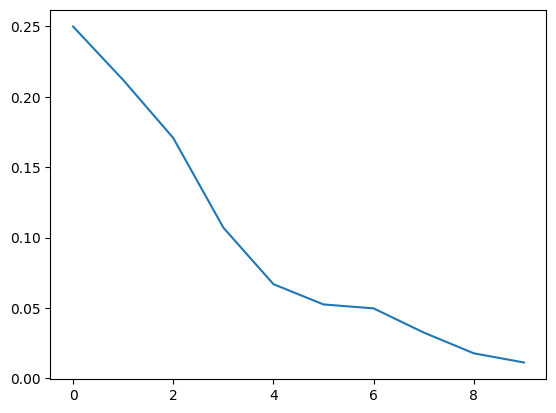

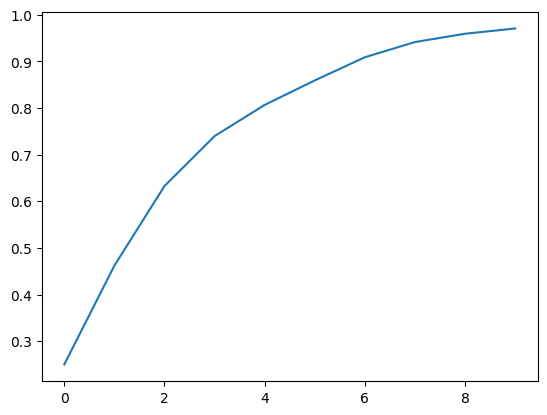

In [81]:
#apply dimensionality reduction
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x_pca=pca.fit_transform(x)

x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca,y,test_size=0.2,random_state=42)

model_pca=RandomForestRegressor()
model_pca.fit(x_train_pca,y_train_pca)
y_pred_pca=model_pca.predict(x_test_pca)
print(mean_squared_error(y_test_pca,y_pred_pca))

#plot the explained variance
plt.plot(pca.explained_variance_ratio_)
plt.show()

#plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [85]:
x_train.shape[1]

57

In [90]:
#train pytorch model
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self,input_size,output_size):
        super(Net,self).__init__()
        self.fc1=nn.Linear(input_size,64)
        self.fc2=nn.Linear(64,32)
        self.fc3=nn.Linear(32,output_size)
    def forward(self,x):
        x=torch.relu(self.fc1(x))
        x=torch.relu(self.fc2(x))
        x=self.fc3(x)
        return x
    def backward(self,x):
        #low 

model=Net(x_train.shape[1],1)

In [105]:
x0=torch.tensor(x_train.values).float()
print(x0)

y0=model(x0)
print(y0)

tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])
tensor([[-0.0302],
        [-0.0293],
        [-0.0293],
        ...,
        [-0.0459],
        [-0.0459],
        [-0.0484]], grad_fn=<AddmmBackward0>)


In [83]:
#define dataset and dataloader
from torch.utils.data import Dataset,DataLoader

class SalaryDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    
train_dataset=SalaryDataset(torch.tensor(x_train.values).float(),torch.tensor(y_train.values).float())
test_dataset=SalaryDataset(torch.tensor(x_test.values).float(),torch.tensor(y_test.values).float()) 

train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

In [109]:
#define loss function and optimizer
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

loss_buffer=[]
#train the model
for epoch in range(10):
    for x_batch,y_batch in train_loader:
        optimizer.zero_grad()
        y_pred=model(x_batch)
        loss=criterion(y_pred.view(-1),y_batch)
        loss.backward()
        optimizer.step()
        loss_buffer.append(loss.item())
    avg_loss=sum(loss_buffer)/len(loss_buffer)
    avg_val_loss=0
    print(f"Epoch {epoch}, loss {avg_loss}")

Epoch 0, loss 3613.6019864646337
Epoch 1, loss 3615.810308969149
Epoch 2, loss 3614.0904834159387
Epoch 3, loss 3612.8502067647955
Epoch 4, loss 3612.3759841754872
Epoch 5, loss 3612.9497902709522
Epoch 6, loss 3612.1116516769575
Epoch 7, loss 3611.888402221023
Epoch 8, loss 3611.529726381655
Epoch 9, loss 3611.328195354503


In [ ]:
def train(model,train_loader,criterion,optimizer):
    model.train()
    loss_buffer=[]
    for i,(x_batch,y_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred=model(x_batch)
        loss=criterion(y_pred.view(-1),y_batch)
        loss.backward()
        optimizer.step()
        loss_buffer.append(loss.item())
    avg_loss=sum(loss_buffer)/len(loss_buffer)
    return avg_loss

def evaluate(model,test_loader,criterion):
    model.eval()
    loss_buffer=[]
    for i,(x_batch,y_batch) in enumerate(test_loader):
        y_pred=model(x_batch)
        loss=criterion(y_pred.view(-1),y_batch)
        loss_buffer.append(loss.item())
    avg_loss=sum(loss_buffer)/len(loss_buffer)
    return avg_loss

In [ ]:
model=Net(x_train.shape[1],1)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
criterion=nn.MSELoss()

train(model,train_loader,criterion,optimizer)
evaluate(model,test_loader,criterion)

In [108]:
#evaluate
model.eval()
x_test_tensor=torch.tensor(x_test.values).float()
y_pred_tensor=model(x_test_tensor)
print(mean_squared_error(y_test,y_pred_tensor.detach().numpy()))

#mae accuracy
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred_tensor.detach().numpy()))

4032.863011327789
45.23006008536977


In [51]:
#% error
print(mean_absolute_error(y_test,y_pred_tensor.detach().numpy())/y_test.mean())

0.2944323767408503


In [114]:
def predict_salary(model,x):
    model.eval() 
    x_tensor=torch.tensor(x.values).float()
    y_pred_tensor=model(x_tensor)*1000
    return y_pred_tensor.detach().numpy()

In [115]:
#predict the salary for the first job in the dataset
x0=x.iloc[0]   
print(x0)

work_year_2020           False
work_year_2021           False
work_year_2022           False
work_year_2023           False
work_year_2024            True
experience_level_EN      False
experience_level_EX      False
experience_level_MI      False
experience_level_SE       True
employment_type_CT       False
employment_type_FL       False
employment_type_FT        True
employment_type_PT       False
employee_residence_AR    False
employee_residence_AT    False
employee_residence_BG    False
employee_residence_BR    False
employee_residence_CA    False
employee_residence_CL    False
employee_residence_CN    False
employee_residence_CR    False
employee_residence_CZ    False
employee_residence_DE    False
employee_residence_DO    False
employee_residence_ES    False
employee_residence_FR    False
employee_residence_GB    False
employee_residence_GR    False
employee_residence_HK    False
employee_residence_HR    False
employee_residence_IN    False
employee_residence_IT    False
employee

In [116]:
salary=predict_salary(model,x0)
print(salary)

[170086.6]
